In [1]:
# pip install pyspark
# conda install -c cyclus java-jdk


* Master node
* Driver program. --> User application
* User application --> spark context
* Spark config <--> Spark context

# Spark Context

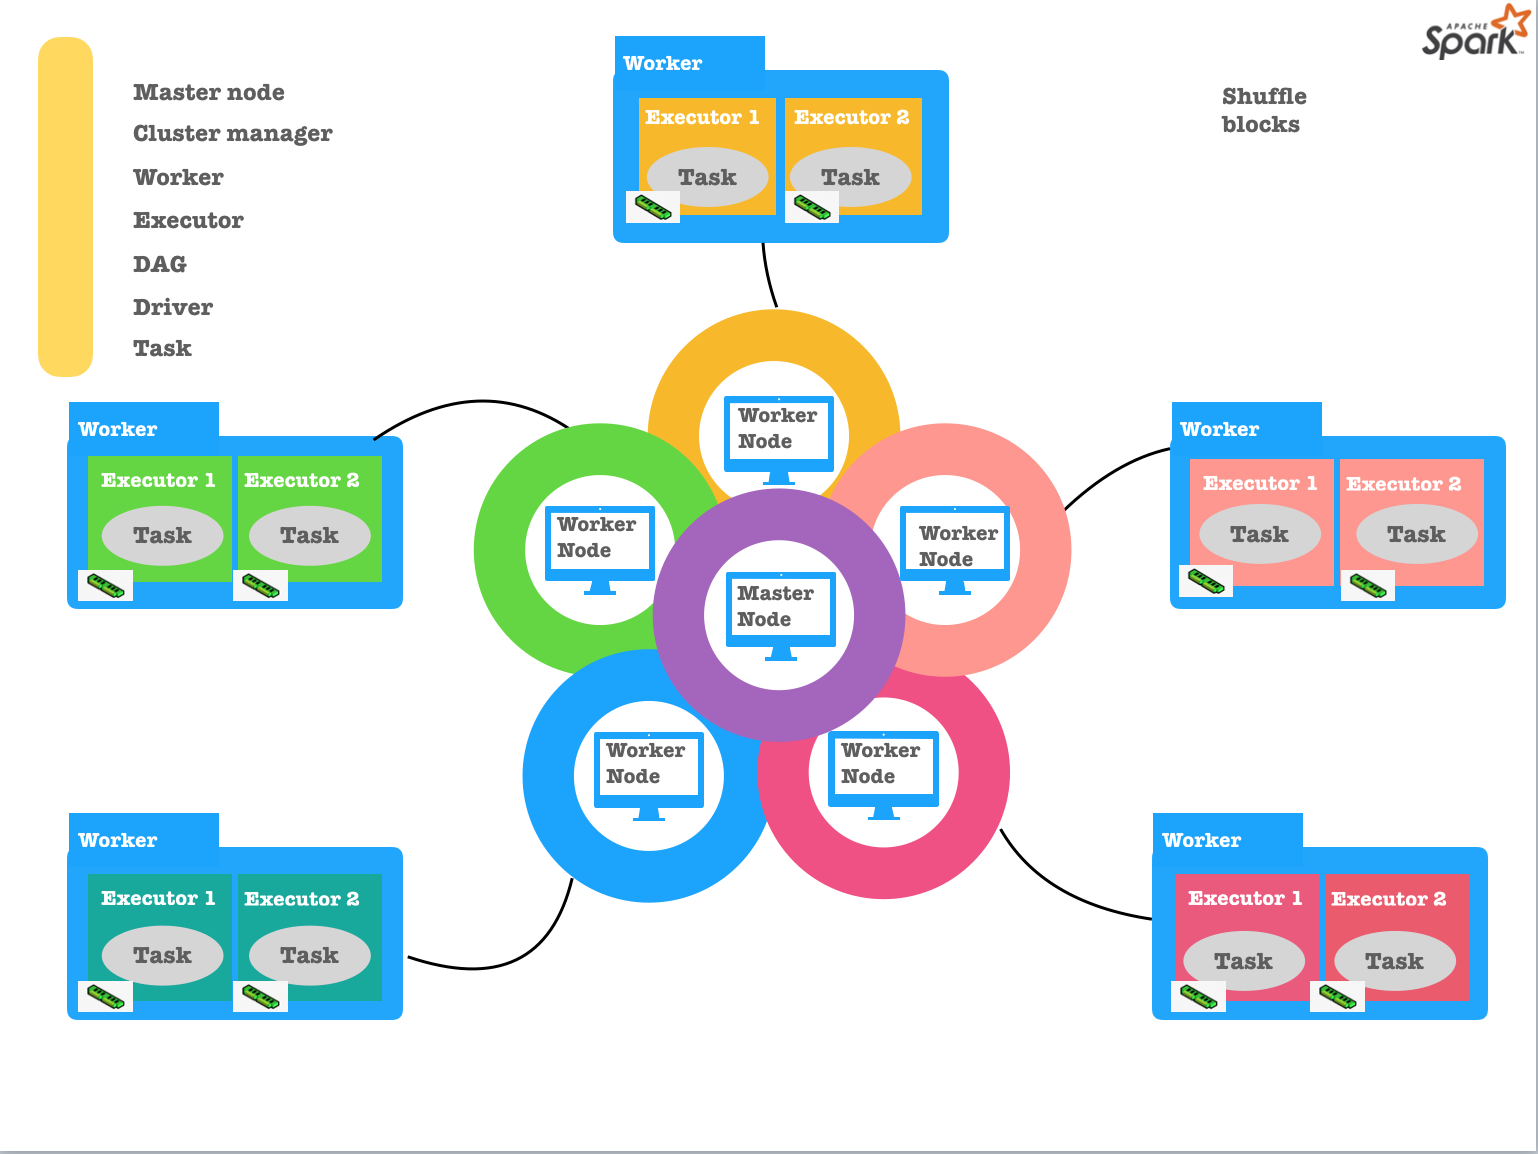

In [2]:
from IPython.display import Image
Image("/home/alinemati/Yandex.Disk/Nirvana/DATA/database/image/architecture.png", width=450, height=450)

In [1]:
from pyspark import SparkConf
conf = SparkConf()\
        .setMaster("local")\
        .setAppName("My User application")\
        .set("spark.executor.instances","1")\
        .set("spark.executor.cores","1")

from pyspark import SparkContext
sc = SparkContext(conf=conf)

In [2]:
print(sc._conf.get("spark.executor.instances"))
print(sc._conf.get("spark.executor.cores"))

1
1


# RDD

* Resilient DD
* Fault tolerance
* Collection of immutable objects

In [3]:
# User
nums = range(0, 10)
nums

range(0, 10)

In [4]:
print(list(nums))
# File
#----

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [5]:
rdd = sc.parallelize(nums, 4)
print("Number of partitions :", rdd.getNumPartitions())


Number of partitions : 4


In [6]:
print("Data present in partition :", rdd.glom().collect())

Data present in partition : [[0, 1], [2, 3, 4], [5, 6], [7, 8, 9]]


Types of Partitioning in Apache Spark

1- Hash Partitioning in Spark

2- Range Partitioning in Spark

## 1 --> computed --> user

# Why we should not have more number of partitions?

In [7]:
rdd = sc.parallelize(nums, 15)
print("Number of partitions :", rdd.getNumPartitions())
print("Data present in partition :", rdd.glom().collect())

Number of partitions : 15
Data present in partition : [[], [0], [1], [], [2], [3], [], [4], [5], [], [6], [7], [], [8], [9]]


4 --> computed -->user

In [8]:
# Let's say you don't want shuffle your data
# Less number of partitions
# coalesce
rdd_small = rdd.coalesce(5, shuffle=False)
print("Number of partitions :", rdd_small.getNumPartitions())
print("Data present in partition :", rdd_small.glom().collect())

Number of partitions : 5
Data present in partition : [[0, 1], [2, 3], [4, 5], [6, 7], [8, 9]]


In [9]:
%%time
rdd = sc.parallelize(nums,5)
new_rdd = rdd.map(lambda x: x+100)
new_rdd.collect()

CPU times: user 14.3 ms, sys: 0 ns, total: 14.3 ms
Wall time: 212 ms


[100, 101, 102, 103, 104, 105, 106, 107, 108, 109]

In [10]:
%%time
rdd = sc.parallelize(nums,1000)
new_rdd = rdd.map(lambda x: x+100)
new_rdd.collect()

CPU times: user 100 ms, sys: 44.1 ms, total: 144 ms
Wall time: 8.61 s


[100, 101, 102, 103, 104, 105, 106, 107, 108, 109]

# PERSIST
* Caching and persist helps you storing intermediate results.
* Mllib go through our datsets multiple times. 
* Even if your data doesn't fit in the RAM try persist in the DISK

In [11]:
import pyspark
rdd = sc.parallelize(nums)
rdd.collect()
rdd.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
print(rdd.getStorageLevel())

Disk Memory Serialized 2x Replicated


# Various Data Sources
1) loading external datasets
2) by parallelizing collection of objects

In [12]:
rdd1 = sc.textFile("sample.txt")
rdd2 = sc.parallelize([1,2])

In [13]:
rdd2.collect()

[1, 2]

# Operations in pyspark
* Transformation
* Action

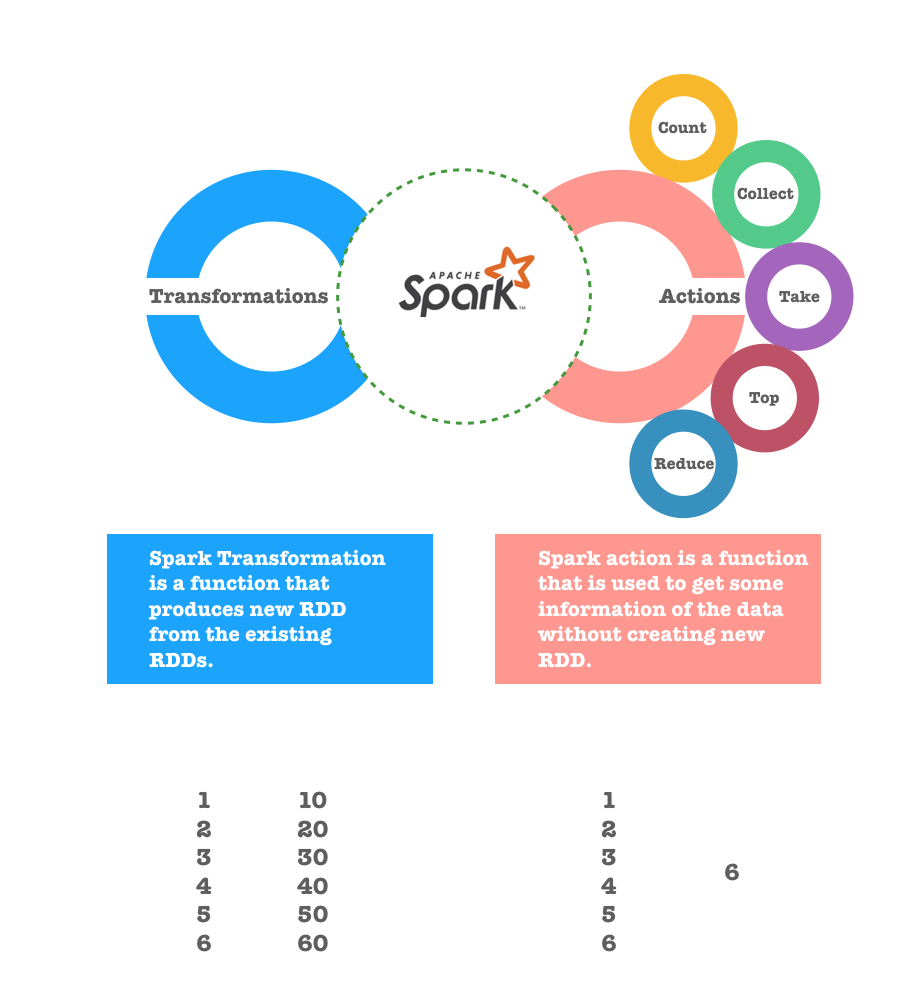

In [16]:
from IPython.display import Image

Image("/home/alinemati/Yandex.Disk/Nirvana/DATA/database/image/operations.png",width=500, height=300)

In [17]:
# # Transformation
#     * map : element wise operation
#     * filter : based on conditions filters the dataset
#     * flatMap : element wise operation + you can create new elements in resultant rdd
#     * distinct : unique elements
#     * intersection
#     * group by key
#     * reduce by key

# # Action
#     * collect
#     * count
#     * first
#     * top
#     * takeSample

# Transformation

In [18]:
# map
import pandas as pd
df = pd.DataFrame({})
df['Names'] = ['Ted' , 'Marshal' , 'Barney']
df['Expense'] = [1000 , 2500 , 3600]
df['New Expense'] = df['Expense'].apply(lambda x: x*13)
df

,Names,Expense,New Expense
0,Ted,1000,13000
1,Marshal,2500,32500
2,Barney,3600,46800


In [19]:
nums = sc.parallelize([1,2,3,4])
nums2 = nums.map(lambda x: x+123)
print("Original rdd ::" , nums.collect())
print("New rdd      ::" , nums2.collect())

Original rdd :: [1, 2, 3, 4]
New rdd      :: [124, 125, 126, 127]


In [20]:
# map transformation

nums = sc.parallelize([1,2,3,4])
nums2 = nums.map(lambda x: x%2==0)
print("Original rdd ::",nums.collect())
print("New rdd      ::", nums2.collect())

Original rdd :: [1, 2, 3, 4]
New rdd      :: [False, True, False, True]


In [21]:
# filter transformation
nums3 = nums.filter(lambda x: x%2==0)
print("Final rdd      ::", nums3.collect())

example = sc.parallelize(["hello", "hi", "hi this is good"])
new_example = example.filter(lambda sen: "hi" in sen)
print("Original example :",example.collect())
print("New example.     :",new_example.collect())

Final rdd      :: [2, 4]
Original example : ['hello', 'hi', 'hi this is good']
New example.     : ['hi', 'hi this is good']


In [22]:
# flatMap
# when you use map: n elements present in org rdd --> new rdd: n
# flat map : n elments in org rdd : for each n you can create multiple elements
example = sc.parallelize(["hello how is your day going on?", 
                          "hi this is going to be fun", 
                          "hi this is good"])
# vocab --> create list of words, --> select distinct words
all_words = example.map(lambda sen: sen.split())
print("All words with map :",all_words.collect())



All words with map : [['hello', 'how', 'is', 'your', 'day', 'going', 'on?'], ['hi', 'this', 'is', 'going', 'to', 'be', 'fun'], ['hi', 'this', 'is', 'good']]


In [23]:
print("")
all_words = example.flatMap(lambda sen: sen.split())
print("All words with flatMap :",all_words.collect())

# distinct
distinct_words = all_words.distinct()
print()
print("Distinct words :",distinct_words.collect())


All words with flatMap : ['hello', 'how', 'is', 'your', 'day', 'going', 'on?', 'hi', 'this', 'is', 'going', 'to', 'be', 'fun', 'hi', 'this', 'is', 'good']

Distinct words : ['hello', 'how', 'is', 'your', 'day', 'going', 'on?', 'hi', 'this', 'to', 'be', 'fun', 'good']


In [24]:
# intersection
num1 = sc.parallelize([1,2,3,4])
num2 = sc.parallelize([1,2,13,14])
inter_ = num1.intersection(num2)
inter_.collect()

[2, 1]

In [25]:
# group by key
example = {('maths',60),("science",10),("english",20),("maths",80)}
data = sc.parallelize(example)
group_ = data.groupByKey().collect()
group_

[('english', <pyspark.resultiterable.ResultIterable at 0x7f8ce52de4a8>),
 ('science', <pyspark.resultiterable.ResultIterable at 0x7f8ce52de4e0>),
 ('maths', <pyspark.resultiterable.ResultIterable at 0x7f8ce52de5f8>)]

In [26]:
for elem in group_:
    print(elem[0], [v for v in elem[1]])

english [20]
science [10]
maths [60, 80]


In [27]:
# reduce by key
subjectwise_students = data.reduceByKey(lambda sub, no: sub+no)
subjectwise_students.collect()

[('english', 20), ('science', 10), ('maths', 140)]

# Action
* collect
* count
* first
* top
* takeSample

In [28]:
# collect
subjectwise_students.collect()

[('english', 20), ('science', 10), ('maths', 140)]

In [29]:
# count
subjectwise_students.count()

3

In [30]:
# first
subjectwise_students.first()

('english', 20)

In [31]:
# top
subjectwise_students.top(2)

[('science', 10), ('maths', 140)]

In [32]:
subjectwise_students.takeSample(False,2,seed=0)
# withReplacement : duplications
# seed = random_state : train_test_split()

[('english', 20), ('maths', 140)]

In [35]:
log4jLogger = sc._jvm.org.apache.log4j
LOGGER = log4jLogger.LogManager.getLogger(__name__)
LOGGER.info("pyspark script logger initialized")

In [45]:
# sc = SparkContext(conf=conf) 
log4jLogger = sc._jvm.org.apache.log4j 
log = log4jLogger.LogManager.getLogger(__name__) 
log.warn("Hello World!")

In [48]:
log.

# What is lazy evaluation in spark?

In [33]:
Image(url="http://static1.tothenew.com/blog/wp-content/uploads/2015/02/image.png")

In [51]:
inputRDD = sc.textFile("log.txt")
errorsRDD = inputRDD.filter(lambda x: "error" in log)
warningsRDD = inputRDD.filter(lambda x: "warning" in log)


In [52]:
errorsRDD.collect()

Traceback (most recent call last):
  File "/home/alinemati/anaconda3/lib/python3.6/site-packages/pyspark/serializers.py", line 590, in dumps
    return cloudpickle.dumps(obj, 2)
  File "/home/alinemati/anaconda3/lib/python3.6/site-packages/pyspark/cloudpickle.py", line 863, in dumps
    cp.dump(obj)
  File "/home/alinemati/anaconda3/lib/python3.6/site-packages/pyspark/cloudpickle.py", line 260, in dump
    return Pickler.dump(self, obj)
  File "/home/alinemati/anaconda3/lib/python3.6/pickle.py", line 409, in dump
    self.save(obj)
  File "/home/alinemati/anaconda3/lib/python3.6/pickle.py", line 476, in save
    f(self, obj) # Call unbound method with explicit self
  File "/home/alinemati/anaconda3/lib/python3.6/pickle.py", line 751, in save_tuple
    save(element)
  File "/home/alinemati/anaconda3/lib/python3.6/pickle.py", line 476, in save
    f(self, obj) # Call unbound method with explicit self
  File "/home/alinemati/anaconda3/lib/python3.6/site-packages/pyspark/cloudpickle.py", l

PicklingError: Could not serialize object: Py4JError: An error occurred while calling o371.__getstate__. Trace:
py4j.Py4JException: Method __getstate__([]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:318)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:326)
	at py4j.Gateway.invoke(Gateway.java:274)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:745)



In [53]:
badLinesRDD = errorsRDD.union(warningsRDD)

Traceback (most recent call last):
  File "/home/alinemati/anaconda3/lib/python3.6/site-packages/pyspark/serializers.py", line 590, in dumps
    return cloudpickle.dumps(obj, 2)
  File "/home/alinemati/anaconda3/lib/python3.6/site-packages/pyspark/cloudpickle.py", line 863, in dumps
    cp.dump(obj)
  File "/home/alinemati/anaconda3/lib/python3.6/site-packages/pyspark/cloudpickle.py", line 260, in dump
    return Pickler.dump(self, obj)
  File "/home/alinemati/anaconda3/lib/python3.6/pickle.py", line 409, in dump
    self.save(obj)
  File "/home/alinemati/anaconda3/lib/python3.6/pickle.py", line 476, in save
    f(self, obj) # Call unbound method with explicit self
  File "/home/alinemati/anaconda3/lib/python3.6/pickle.py", line 751, in save_tuple
    save(element)
  File "/home/alinemati/anaconda3/lib/python3.6/pickle.py", line 476, in save
    f(self, obj) # Call unbound method with explicit self
  File "/home/alinemati/anaconda3/lib/python3.6/site-packages/pyspark/cloudpickle.py", l

PicklingError: Could not serialize object: Py4JError: An error occurred while calling o371.__getstate__. Trace:
py4j.Py4JException: Method __getstate__([]) does not exist
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:318)
	at py4j.reflection.ReflectionEngine.getMethod(ReflectionEngine.java:326)
	at py4j.Gateway.invoke(Gateway.java:274)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:745)



In [35]:
badLinesRDD.collect()

NameError: name 'badLinesRDD' is not defined